## Mixed data type
In many applications we must deal with mixed measurements (outputs). We consider again the manufacturing dataset including the temperature of the manufacturing process and the quality of the final product.
However, in this case, we have two different types of quality measurements:

1. interval data $[y^l_i,y^u_i]$
2. scalar data $y_i$

the input is the temperature $t_i$.

You goal is to implement a Bayesian linear regression model with mixed type outputs. That is you must implement the following probabilistic model:

**Likelihood**

Scalar data: 
$$
p(y_i|\alpha,\beta,\sigma, t_i)=N(y_i;\mu_i, \sigma)
$$
with $\mu_i=\alpha+\beta t_i$.

Interval data
$$
p(y^l_i,y^u_i|\alpha,\beta,\sigma,t_i)=\Phi((y^u_i-\mu_i)/\sigma,0,1)\Phi(-(y^l_i-\mu_i)/\sigma,0,1)
$$
with $\mu_i=\alpha+\beta t_i$.

Therefore, assuming the observations are independent

$$
p(Data|\alpha,\beta,\sigma)=\prod_{i=1}^{n_s}N(y_i;\mu_i, \sigma)\prod_{i=1}^{n_r}\Phi((y^u_i-\mu_i)/\sigma,0,1)\Phi(-(y^l_i-\mu_i)/\sigma,0,1)
$$
where $n_r$ is the number of measurements of type "interval" and  $n_s$ is the number of measurements of type "scalar"

**Prior**
$$
p(\alpha)=N(\alpha,0,30), ~~p(\beta)=N(\beta,0,30), ~~p(\sigma)=\text{Uniform}(\sigma,0.0001,30)
$$

**Posterior** 
You have to use PyMC3 to sample from the posterior define by the above model, that is

$$
\underbrace{p(\alpha,\beta,\sigma|\text{data})}_{\text{posterior}} = \frac{\underbrace{\prod_{i=1}^{n_s}N(y_i;\mu_i, \sigma)\prod_{i=1}^{n_r}\Phi((y^u_i-\mu_i)/\sigma,0,1)\Phi(-(y^l_i-\mu_i)/\sigma,0,1)}_{\text{likelihood}}\underbrace{N(\alpha,0,30)N(\alpha,0,30)\text{Uniform}(\sigma,0.001,30)}_{\text{prior}}}{\underbrace{p(\text{data})}_{\text{evidence}}}
$$

**Question**
Our goal is to answer the following question: Can we guarantee that the quality of a product manufactured a 320 degree is at least $7.2$? Let's assume that this is important to satisfy a requirement from a customer.

Hereafter, we provided a code to load the dataset.

In [95]:
import numpy as np
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import ast 

df=pd.read_csv("../datasets/manufacturing_quality_mixed_scalar_interval.csv",delimiter=",")
df=df.iloc[:,1:]
df.head(10)

,temperature,Quality
0,184.0,[3.86]
1,244.0,"[4.0, 6.0]"
2,100.0,"[0.0, 3.0]"
3,160.0,"[2.0, 4.0]"
4,130.0,"[2.0, 4.0]"
5,118.0,"[1.0, 4.0]"
6,138.0,"[1.0, 4.0]"
7,170.0,"[1.0, 4.0]"
8,180.0,"[2.0, 5.0]"
9,208.0,"[2.0, 6.0]"


Note that the first quality measurement is a scalar, while the second is an interval.

In [96]:
Y=[]
for i in range(len(df.iloc[:,1])):
    Y.append(ast.literal_eval(df.iloc[i,1]))
temperatures=df.iloc[:,0].values
sizes=[len(d) for d in Y]
sizes=np.array(sizes)

tn=temperatures[sizes==1]#temperatures for the scalar observations
ti=temperatures[sizes==2]#temperatures for the interval observations

yn=np.vstack(np.array(Y)[sizes==1])#scalar observations
Yi=np.vstack(np.array(Y)[sizes==2])#interval observations
yl=Yi[:,0]#lower
yu=Yi[:,1]#upper

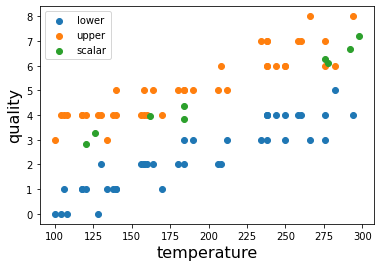

In [97]:
plt.scatter(ti,yl, color='C0' ,label='lower')
plt.scatter(ti,yu, color='C1'  ,label='upper')
plt.scatter(tn,yn, color='C2'  ,label='scalar')
plt.legend()
plt.xlabel("temperature",fontsize=16)
plt.ylabel("quality",fontsize=16);

## Solution 
This is the solution you should obtain

![alt text](solution_problem_mixed1.png "Regression lines and uncertainty")
![alt text](solution_problem_mixed2.png "Posterior uncertainty at 320")